# Data preprocessing, EDA and visualization 📊🧮

This notebook includes a series of steps to load, clean, and analyze a dataset. We will:

1. Loading the survey data.
   
2. Analyzing missing values.
   
3. Handling missing values.
   
4. Performing exploratory data analysis (EDA).
   
5. Visualizing the most interesting findings.
   
6. Providing selection based on rows and/or columns (if needed)

### Loading the survey data 📥

First, we'll load the data from the CSV file into a pandas DataFrame and display the first few rows to understand the structure of the dataset.

- We'll load the CSV file into pandas DataFrame using `pd.read_csv(file_path)`.
  
- Then we'll use `head(3)` to display the first 3 rows of the data.

In [6]:
import pandas as pd

# Path to the file
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\01_Raw\01_DataCompetencySurvey.csv'

# Loading the data
data = pd.read_csv(file_path)

# Displaying the first three rows
print("Initial data:")
print(data.head(3))

Initial data:
   ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  Nazwa  \
0   1  2024-03-05 15:25:52  2024-03-05 15:33:04    anonymous    NaN   
1   2  2024-03-05 15:29:46  2024-03-05 15:35:02    anonymous    NaN   
2   3  2024-03-05 15:16:30  2024-03-05 15:37:17    anonymous    NaN   

   Czas ostatniej modyfikacji  \
0                         NaN   
1                         NaN   
2                         NaN   

  Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  \
0  Projekt "data" będący mobilną stacją benzynową...                                                    
1                                                NaN                                                    
2                                                NaN                                                    

      W jaki sposób chcesz uczestniczyć w Community?  Programming: R  \
0  Chcę uczestniczyć w projekcie data i organizow...             2.0   
1  

Now let's try checking basic statistics of loaded data.

In [8]:
data.describe()

,ID,Nazwa,Czas ostatniej modyfikacji,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,67.000000,0.0,0.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,34.000000,NaN,NaN,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,...,1.400000,1.733333,1.483333,1.050000,1.633333,1.216667,1.333333,1.233333,1.416667,1.083333
std,19.485037,NaN,NaN,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,...,0.960226,1.147830,1.016669,0.909926,0.956098,0.922261,0.985775,0.908839,0.869281,0.869281
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,NaN,NaN,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000
50%,34.000000,NaN,NaN,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,50.500000,NaN,NaN,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


Out of 45 columns only 38 were taken into consideration, which might point to the fact that the other 7 columns are non-numeric.

---

### Analyzing missing values 🔎

Next, we'll check which columns have missing values and how many missing values there are. This step helps us understand the completeness of the data and plan for handling any missing values.

This step is crucial for understanding the quality of the dataset and planning how to handle any gaps in the data. We will explore the following:

- Simple overview of missing values to identify which columns have missing values and how many missing values there are in each column,
  
- Percentage of missing values for each column to get a better sense of the data quality,

- Visualizing missing data to get a more intuitive understanding of where the missing values are located.

In [21]:
# Information about the data
print("\nData info:")
print(data.info())

# Checking for non-null values
non_null_values = data.notnull().sum()
print("\nNon-null values:")
# Sorting non-null values in ascending order
non_null_values_sorted = non_null_values.sort_values()
print(non_null_values_sorted)


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 45 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   ID                                                                                                   67 non-null     int64  
 1   Godzina rozpoczęcia                                                                                  67 non-null     object 
 2   Godzina ukończenia                                                                                   67 non-null     object 
 3   Adres e-mail                                                                                         67 non-null     object 
 4   Nazwa                                                                                               

- `data.info()` - provides a concise summary of the DataFrame, including the number of non-null values in each column.

- `data.notnull()` - creates a DataFrame with the same structure as data, where each value is True if it is non-null and False otherwise.

- `.sum()` is then called on this DataFrame to count the non-null values in each column.

### Percentage of missing values °/•

To understand the extent of missing values, we calculate their percentage for each column and sort them accordingly.

In [23]:
# Calculating percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of missing values:")
# Sorting the missing percentage in descending order
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage_sorted)


Percentage of missing values:
Nazwa                                                                                                  100.000000
Czas ostatniej modyfikacji                                                                             100.000000
Jeżeli pominięto branżę, na której się znasz dopisz ją:                                                 85.074627
Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:                             80.597015
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.     71.641791
Programming: R                                                                                          11.940299
Cloud: GPC                                                                                              11.940299
Programming: Python                                                                                     11.940299
Area: NLP                                                

- `missing_values / len(data)` - divides the number of missing values by the total number of rows to get the proportion of missing values.

- `*100` - converts the proportion to a percentage

### Visualizing missing data

Visualizations can help us quickly understand the distribution of missing values in the dataset. We will use a heatmap to visualize missing data.

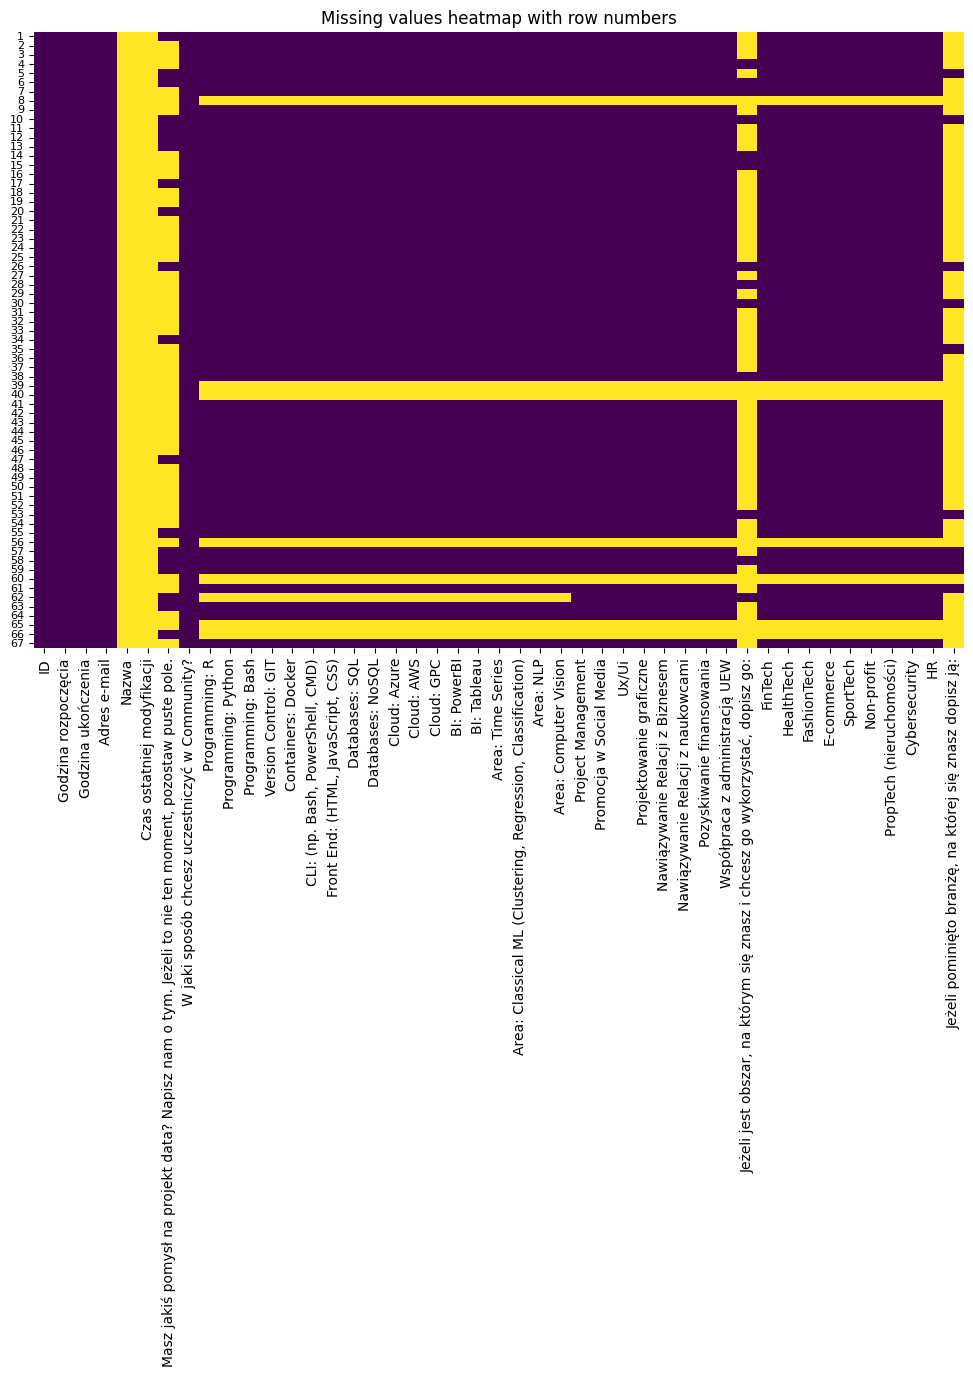

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing values using a heatmap with row numbers
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=(data.index + 1), annot=False)
plt.yticks(fontsize=8)
plt.title('Missing values heatmap with row numbers')
plt.show()

### Seaborn & matplotlib formula explaination:

`data.isnull()` - creates a DataFrame of the same shape as data with True for missing values and False for non-missing values.

`cbar=False` - hides the color bar to keep the plot clean.

`cmap='viridis'` - sets the color map to 'viridis', which is visually appealing and helps distinguish between missing and non-missing values.

`yticklabels=False` - hides the y-axis labels to reduce clutter.

`yticks(fontsize=8)` - lessens the Y axis font size to 8 for uncluttering.

After analyzing the missing values in the dataset, we can draw several important conclusions that will guide our data cleaning and preprocessing steps. Summarizing of our findings and the corresponding conclusions:

- Using `data.info()`, we observed that some columns have missing values, which are represented as NaN in the DataFrame.
The *missing_values* series indicates which columns have missing values and how many there are in each column.

- By calculating the percentage of missing values for each column, we can assess the extent of the missing data.

If a column has a very high percentage of missing values, it might be considered for removal, as it may not provide much useful information.
Conversely, columns with low percentages of missing values might be good candidates for imputation, where we fill in the missing values with appropriate substitutes (e.g., mean, median, mode).

- The heatmap provides a visual representation of the missing data, showing us the distribution of missing values across the dataset.
This visual aid helps us quickly identify any patterns in the missing data, such as whether the missing values are randomly distributed or if there are entire rows or columns with missing data.

Based on the analysis of missing values, we can conclude the following:

- Columns with a high percentage of missing values may need to be removed if they do not contribute significantly to the analysis.

- Columns with a low percentage of missing values can be imputed with the mean, median, or mode, depending on the nature of the data.

- If the missing values are randomly distributed, simple imputation methods may suffice.

- If there are patterns (e.g., missing values clustered in specific rows or columns), we may need to investigate further to understand the reasons behind the missing data and choose appropriate handling methods.

Based on the visual represantion of missing values (heatmap) we can see that the most empty columns are:

- `Nazwa` (name) - **100% missing values** - 0 values
  
- `Czas ostatniej modyfikacji` (last modified) - **100% missing values** - 0 values
  
- `Jeżeli pominięto branżę, na której się znasz dopisz ją:` - **85,07% missing values** - 10 values
  
- `Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:` - **80,6% missing values** - 13 values
 
- `Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.` - **71,64% missing values** - 19 values

All these fields are non-numeric data, which is harder to analyze and doesn't contribute much to the overall picture, so I decided to drop them from the dataset in the later stage of this analysis.

---

Now we will obtain information about **top 10 rows**, which introduce the largest portion of missing data.

In [13]:
# Identifying top 10 rows with the most missing values

missing_values_count = data.isnull().sum(axis=1)
rows_with_most_missing = missing_values_count.sort_values(ascending=False).head(10)

print(rows_with_most_missing)

55    40
64    40
7     40
39    40
38    40
59    40
65    39
61    21
1      5
48     5
dtype: int64


## Handling missing values

### Removing columns with high percentage of missing values ⛔

Knowing the number of rows and columns and specific rows with the most missing values we can now specify the threshold. If any row has more than a specified threshold (25%) of missing values, we might consider removing it.

In [24]:
# Defining the threshold for missing values (our threshold will be 25%)
threshold = 25

# Calculating the percentage of missing values in each row
missing_percentage = data.isnull().mean(axis=1) * 100

# Identifying rows where missing values exceed the threshold
rows_above_threshold = data[missing_percentage > threshold]

# Printing rows that have missing values exceeding the threshold
print("\nRows with missing values exceeding 25% threshold:")
print(rows_above_threshold)

# If you want to drop these rows from the original dataset
data_cleaned = data[missing_percentage <= threshold]
print("\nData after removing rows with high percentage of missing values:")
print(data_cleaned)


Rows with missing values exceeding 25% threshold:
    ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  Nazwa  \
7    8  2024-03-05 15:50:55  2024-03-05 15:52:28    anonymous    NaN   
38  39  2024-03-06 19:15:27  2024-03-06 19:15:56    anonymous    NaN   
39  40  2024-03-06 19:48:41  2024-03-06 19:48:50    anonymous    NaN   
55  56  2024-03-15 07:11:47  2024-03-15 07:12:01    anonymous    NaN   
59  60  2024-03-25 15:50:03  2024-03-25 15:50:19    anonymous    NaN   
61  62  2024-03-26 09:52:57  2024-03-26 09:57:41    anonymous    NaN   
64  65  2024-04-08 10:31:25  2024-04-08 10:32:10    anonymous    NaN   
65  66  2024-04-08 21:45:20  2024-04-08 21:46:43    anonymous    NaN   

    Czas ostatniej modyfikacji  \
7                          NaN   
38                         NaN   
39                         NaN   
55                         NaN   
59                         NaN   
61                         NaN   
64                         NaN   
65                         N

After this action performed, we deleted 8 rows and now have 59 rows of useful data instead of 67.

---

Now let's drop some irrelevant columns. As mentioned before, we will drop columns with the biggest number of empty values. In this case, we observed 5 outstandingly empty columns with over 70% of empty values.

In [59]:
# Columns to drop based on the missing percentage
columns_to_drop = [
    'Nazwa',
    'Czas ostatniej modyfikacji',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'
]

# Dropping the specified columns from the cleaned dataset
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

# Checking the size of the cleaned dataset after dropping columns
dataset_size = data_cleaned_dropped.shape

# Display the size of the cleaned dataset
print("Number of rows:", dataset_size[0])
print("Number of columns:", dataset_size[1])

# Display the first few rows of the updated dataset to confirm the columns are dropped
print(data_cleaned_dropped.head())

Number of rows: 59
Number of columns: 40
   ID  Godzina rozpoczęcia   Godzina ukończenia Adres e-mail  \
0   1  2024-03-05 15:25:52  2024-03-05 15:33:04    anonymous   
1   2  2024-03-05 15:29:46  2024-03-05 15:35:02    anonymous   
2   3  2024-03-05 15:16:30  2024-03-05 15:37:17    anonymous   
3   4  2024-03-05 15:34:17  2024-03-05 15:38:01    anonymous   
4   5  2024-03-05 15:34:26  2024-03-05 15:38:20    anonymous   

      W jaki sposób chcesz uczestniczyć w Community?  Programming: R  \
0  Chcę uczestniczyć w projekcie data i organizow...             2.0   
1                 Chcę uczestniczyć w projekcie data             3.0   
2                 Chcę uczestniczyć w projekcie data             0.0   
3  Chcę uczestniczyć w projekcie data i organizow...             3.0   
4  Chcę uczestniczyć w projekcie data i organizow...             3.0   

   Programming: Python  Programming: Bash  Version Control: GIT  \
0                  3.0                3.0                   4.0   
1      

Let's compare two datasets, before and after resizing.

In [62]:
# Checking the size of the original dataset
original_dataset_size = data.shape

# Display the size of the original dataset
print("Number of rows:", original_dataset_size[0])
print("Number of columns:", original_dataset_size[1])

# Checking the size of the original dataset
data_cleaned_dropped = data_cleaned_dropped.shape

# Display the size of the original dataset
print("New number of rows:", data_cleaned_dropped[0])
print("New number of columns:", data_cleaned_dropped[1])


Number of rows: 67
Number of columns: 45
New number of rows: 59
New number of columns: 40


As we see, the dataset shrinked a bit. In the next step I will save this file locally and put it in a `02_Interim` data folder.

In [63]:
# Ensuring that data_cleaned is defined correctly as a df
if isinstance(data_cleaned, pd.DataFrame):
    print("data_cleaned is a DataFrame.")
else:
    print("data_cleaned is not a DataFrame. Please check your variable assignment.")

# Columns to drop
columns_to_drop = [
    'Nazwa',
    'Czas ostatniej modyfikacji',
    'Jeżeli pominięto branżę, na której się znasz dopisz ją:',
    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
    'Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.'
]

# Dropping specified columns from the cleaned dataset
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

# Confirming the DataFrame type
if isinstance(data_cleaned_dropped, pd.DataFrame):
    print("data_cleaned_dropped is a DataFrame.")
else:
    print("data_cleaned_dropped is not a DataFrame. Please check the drop operation.")

# Save the cleaned and updated dataset to a CSV file
output_file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
data_cleaned_dropped.to_csv(output_file_path, index=False)

print(f"Dataset saved to {output_file_path}")


data_cleaned is a DataFrame.
data_cleaned_dropped is a DataFrame.
Dataset saved to D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv


Now the dataset is exported successfully on my local machine.

---

## Exploratory data analysis

In this section I will cover exploratory data analysis techniques.

In [9]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 
wr.filterwarnings('ignore') 

# Loading the dataset
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
cleaned = pd.read_csv(file_path)

After importing necessary libraries and cleaned .csv file from the previous part, we can now start with basic data exploration and later on go into details.

In [ ]:
# Display basic information about the dataset
print("Data Info:")
print(cleaned.info())

# Display basic statistics of the dataset
print("\nBasic Statistics:")
print(cleaned.describe(include='all'))

In [ ]:
# Checking for missing values
missing_values = cleaned.isnull().sum()
print("\nMissing values:")
print(missing_values[missing_values > 0])

In [ ]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned.isnull(), cbar=False, cmap='viridis', yticklabels=True)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Plot histograms for numerical columns
cleaned.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [ ]:
# Display correlation matrix
correlation_matrix = cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Pairplot for numerical columns
sns.pairplot(cleaned.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

In [ ]:
# Count plots for categorical columns
categorical_columns = cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=cleaned[column], order=cleaned[column].value_counts().index)
    plt.title(f'Count Plot for {column}')
    plt.show()

In [ ]:
# Box plot to identify outliers
for column in cleaned.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cleaned[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
# Example: Extracting year, month, and day from a datetime column (if applicable)
# cleaned['date_column'] = pd.to_datetime(cleaned['date_column'])
# cleaned['year'] = cleaned['date_column'].dt.year
# cleaned['month'] = cleaned['date_column'].dt.month
# cleaned['day'] = cleaned['date_column'].dt.day

In [ ]:
# Log transformation (if applicable)
# cleaned['log_column'] = cleaned['numerical_column'].apply(lambda x: np.log(x + 1))

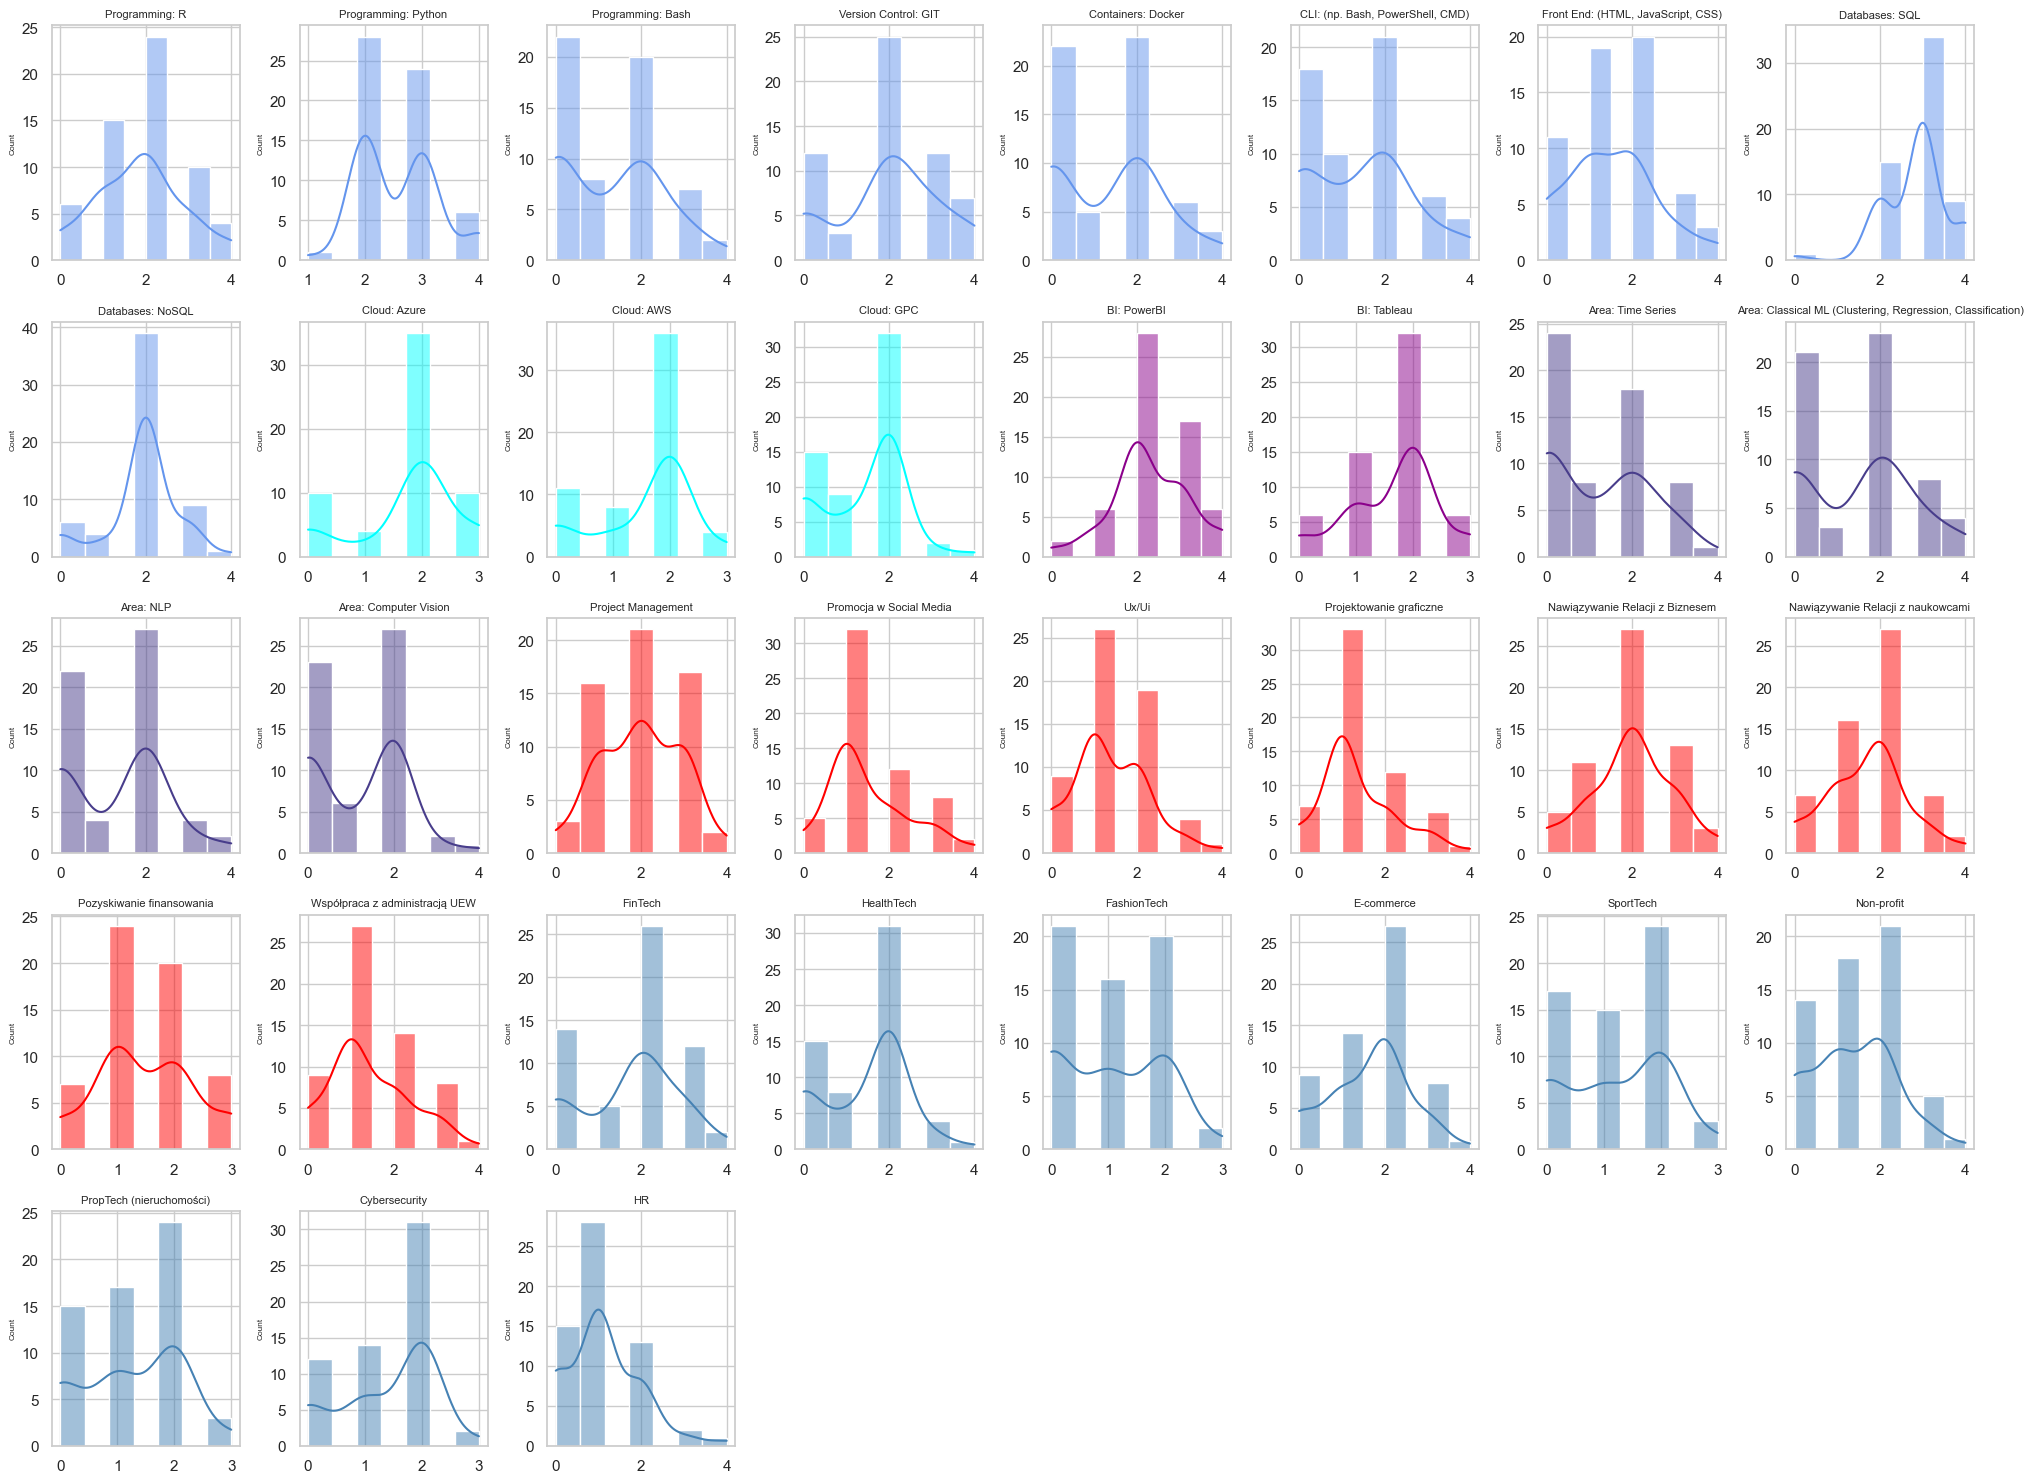

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the groups for different skill types
hard_skills = ['Programming: R', 'Programming: Python', 'Programming: Bash', 'Databases: SQL', 'Databases: NoSQL', 'Version Control: GIT', 'Containers: Docker', 'CLI: (np. Bash, PowerShell, CMD)', 'Front End: (HTML, JavaScript, CSS)']
bi = ['BI: Power BI', 'BI: Tableau']
ml = ['Area: Classical ML (Clustering, Regression, Classification)', 'Area: Time Series', 'Area: NLP', 'Area: Computer Vision']
cloud = ['Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC']
soft_skills = ['Project Management', 'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 'Współpraca z administracją UEW']

# Assign colors to different groups
colors = {
    'Programming: R': 'cornflowerblue',
    'Programming: Python': 'cornflowerblue',
    'Programming: Bash': 'cornflowerblue',
    'Databases: SQL': 'cornflowerblue', 
    'Databases: NoSQL': 'cornflowerblue',
    'Version Control: GIT': 'cornflowerblue',
    'Containers: Docker': 'cornflowerblue',
    'CLI: (np. Bash, PowerShell, CMD)': 'cornflowerblue',
    'Front End: (HTML, JavaScript, CSS)': 'cornflowerblue',
    'Area: Classical ML (Clustering, Regression, Classification)': 'darkslateblue',
    'Area: Time Series': 'darkslateblue',
    'Area: NLP': 'darkslateblue',
    'Area: Computer Vision': 'darkslateblue',
    'BI: PowerBI': 'darkmagenta', 
    'BI: Tableau': 'darkmagenta',
    'Cloud: Azure': 'cyan',
    'Cloud: AWS': 'cyan',
    'Cloud: GPC': 'cyan',
    'Project Management': 'red',
    'Promocja w Social Media': 'red',
    'Ux/Ui': 'red',
    'Projektowanie graficzne': 'red',
    'Nawiązywanie Relacji z Biznesem': 'red',
    'Nawiązywanie Relacji z naukowcami': 'red',
    'Pozyskiwanie finansowania': 'red',
    'Współpraca z administracją UEW': 'red'
    ''
}

# Plotting histograms for numerical variables without the 'ID' column and grouping by skill types with colors
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols_no_id, 1):
    plt.subplot(5, 8, i)
    color = colors[col] if col in colors else 'steelblue'  # Default color for ungrouped columns
    sns.histplot(cleaned[col], kde=True, color=color)
    plt.title(col, fontsize=8)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=6)
plt.tight_layout()
plt.show()


In [ ]:
# Recreate the correlation heatmap
correlation_matrix_no_id = cleaned[numerical_cols_no_id].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_no_id, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation heatmap")
plt.show()

# Analyzing the categorical variable "W jaki sposób chcesz uczestniczyć w Community?"
plt.figure(figsize=(10, 6))
sns.countplot(y='W jaki sposób chcesz uczestniczyć w Community?', data=cleaned, palette='viridis')
plt.title("Participation Preference in Community")
plt.xlabel("Count")
plt.ylabel("Participation Preference")
plt.show()